In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [3]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [4]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/happy/0132a06d_nohash_0.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [5]:
len(x),sum(x)

(16000, 0.74755859375)

<IPython.core.display.Javascript object>


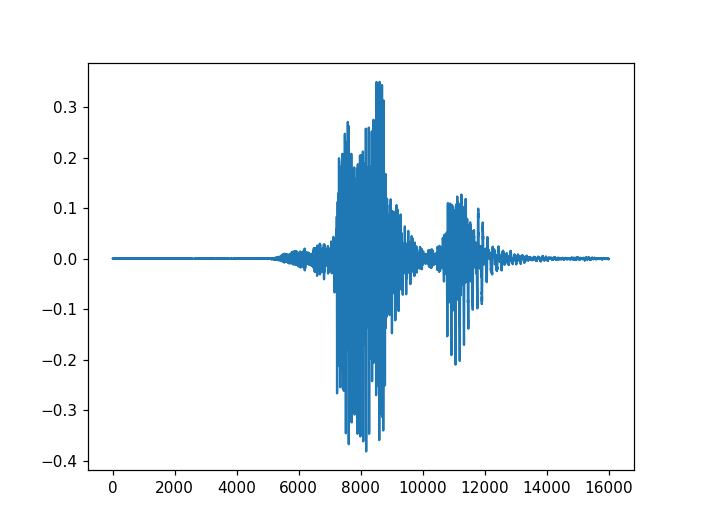

In [6]:
plt.figure(),plot(x);plt.show()

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 76320.7147149
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-37.8338094563-134.859405404j)
(51, 16000)


<IPython.core.display.Javascript object>


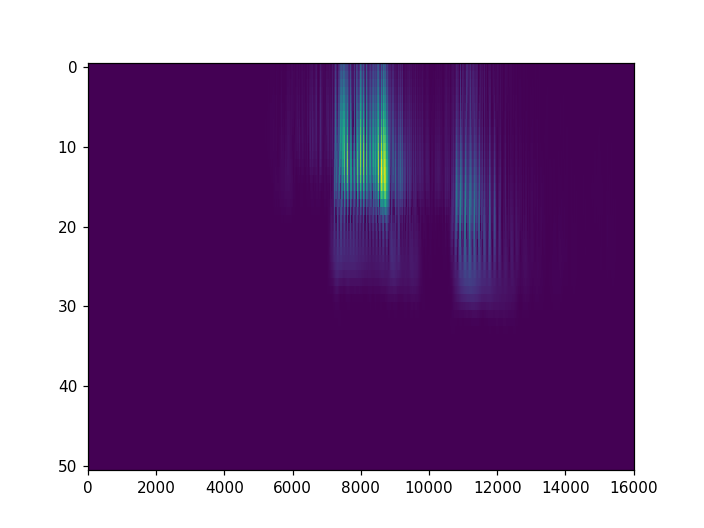

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 -24128.7781221
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-30.4094993364-38.191237713j)
(51, 16000)


<IPython.core.display.Javascript object>


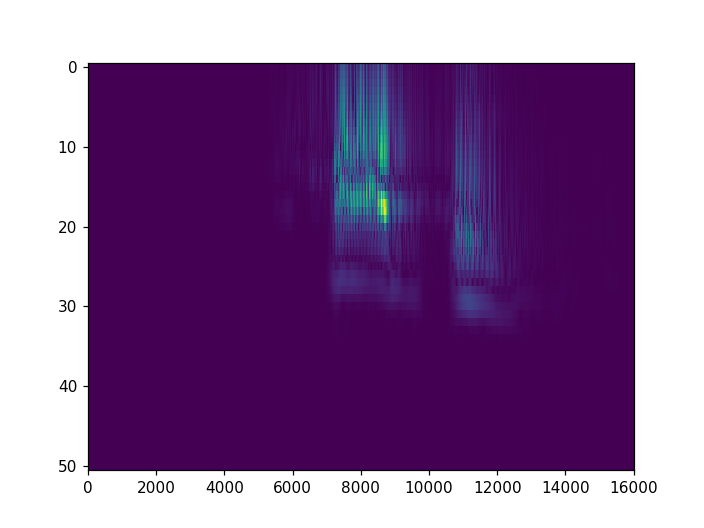

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 37895.4141691
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-28.1575786814-67.1421141671j)
(51, 16000)


<IPython.core.display.Javascript object>


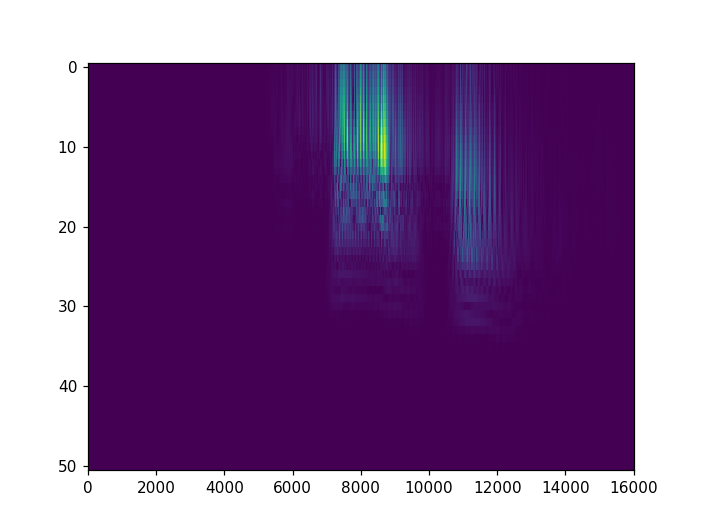

(51, 16000)


In [17]:
lst=[]
lst2=[]

for K in range(3):
    a=morsetrans(x,K, 3,1)
    lst.append(a)
    b=np.log1p(np.abs(a))
    print b.shape
    plt.figure();imshow(b,aspect='auto');plt.show()
    lst2.append(b)
a=np.sum(lst,0)
b=np.log1p(np.abs(a))
print b.shape
imshow(b,aspect='auto');plt.show()


In [18]:
 np.sort(b.reshape([-1]))[-100:].mean()

0.52854023356413116

<IPython.core.display.Javascript object>


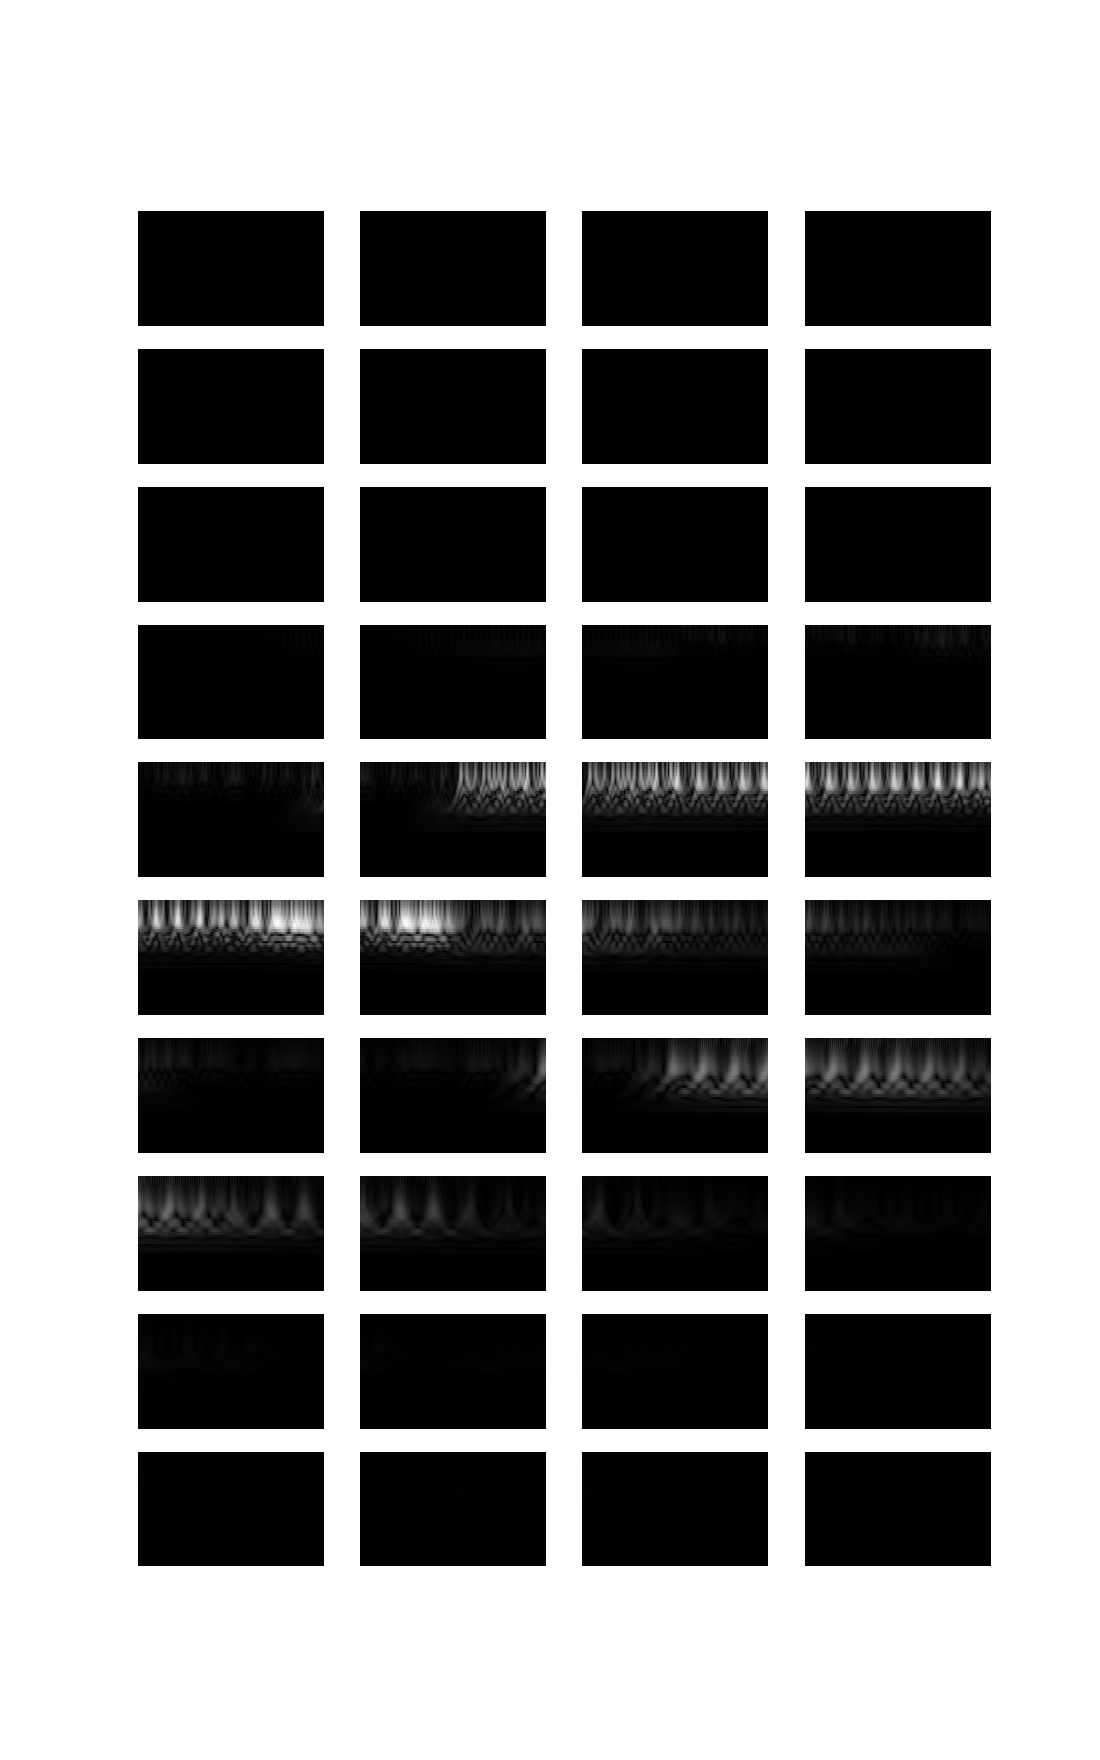

0.000131811936063 0.000115539866795
0 0 1 1
0.00014864577459 0.000140979197429
0 0 1 2
0.00016470732194 0.000151164320065
0 0 1 3
0.00013855014546 0.000130978950575
0 0 1 4
0.000126295719516 0.000121948396053
0 0 2 1
0.000129904427073 0.000122388588168
0 0 2 2
0.000121004809487 0.000117798687394
0 0 2 3
9.79200107434e-05 0.000100849047828
0 0 2 4
9.12322129668e-05 9.51781146981e-05
0 0 3 1
0.000104134252087 0.000110599746687
0 0 3 2
0.00012652937175 0.000129016567809
0 0 3 3
0.000198989630333 0.000289990135574
0 1 3 4
0.000940442905074 0.0021465330304
0 7 4 1
0.00284221473378 0.00476300484008
0 11 4 2
0.00386686698625 0.00617940731883
0 19 4 3
0.00497340538012 0.00911762877164
0 27 4 4
0.00819919556877 0.0129742328521
0 41 5 1
0.0399490928554 0.0719354670966
0 195 5 2
0.0714737618612 0.0961608540938
0 225 5 3
0.0729059296851 0.101449533105
0 231 5 4
0.0867978476149 0.122363174848
0 255 6 1
0.0719934775318 0.10809597117
0 255 6 2
0.0335129106617 0.0421741157399
0 129 6 3
0.0178221766376

In [19]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

In [11]:
from skimage.transform import resize
from PIL import Image
import PIL

In [12]:
a=Image.fromarray(bb)
print a.size
a=a.resize((119, 119))
a.size

(400, 51)


(119, 119)

<IPython.core.display.Javascript object>


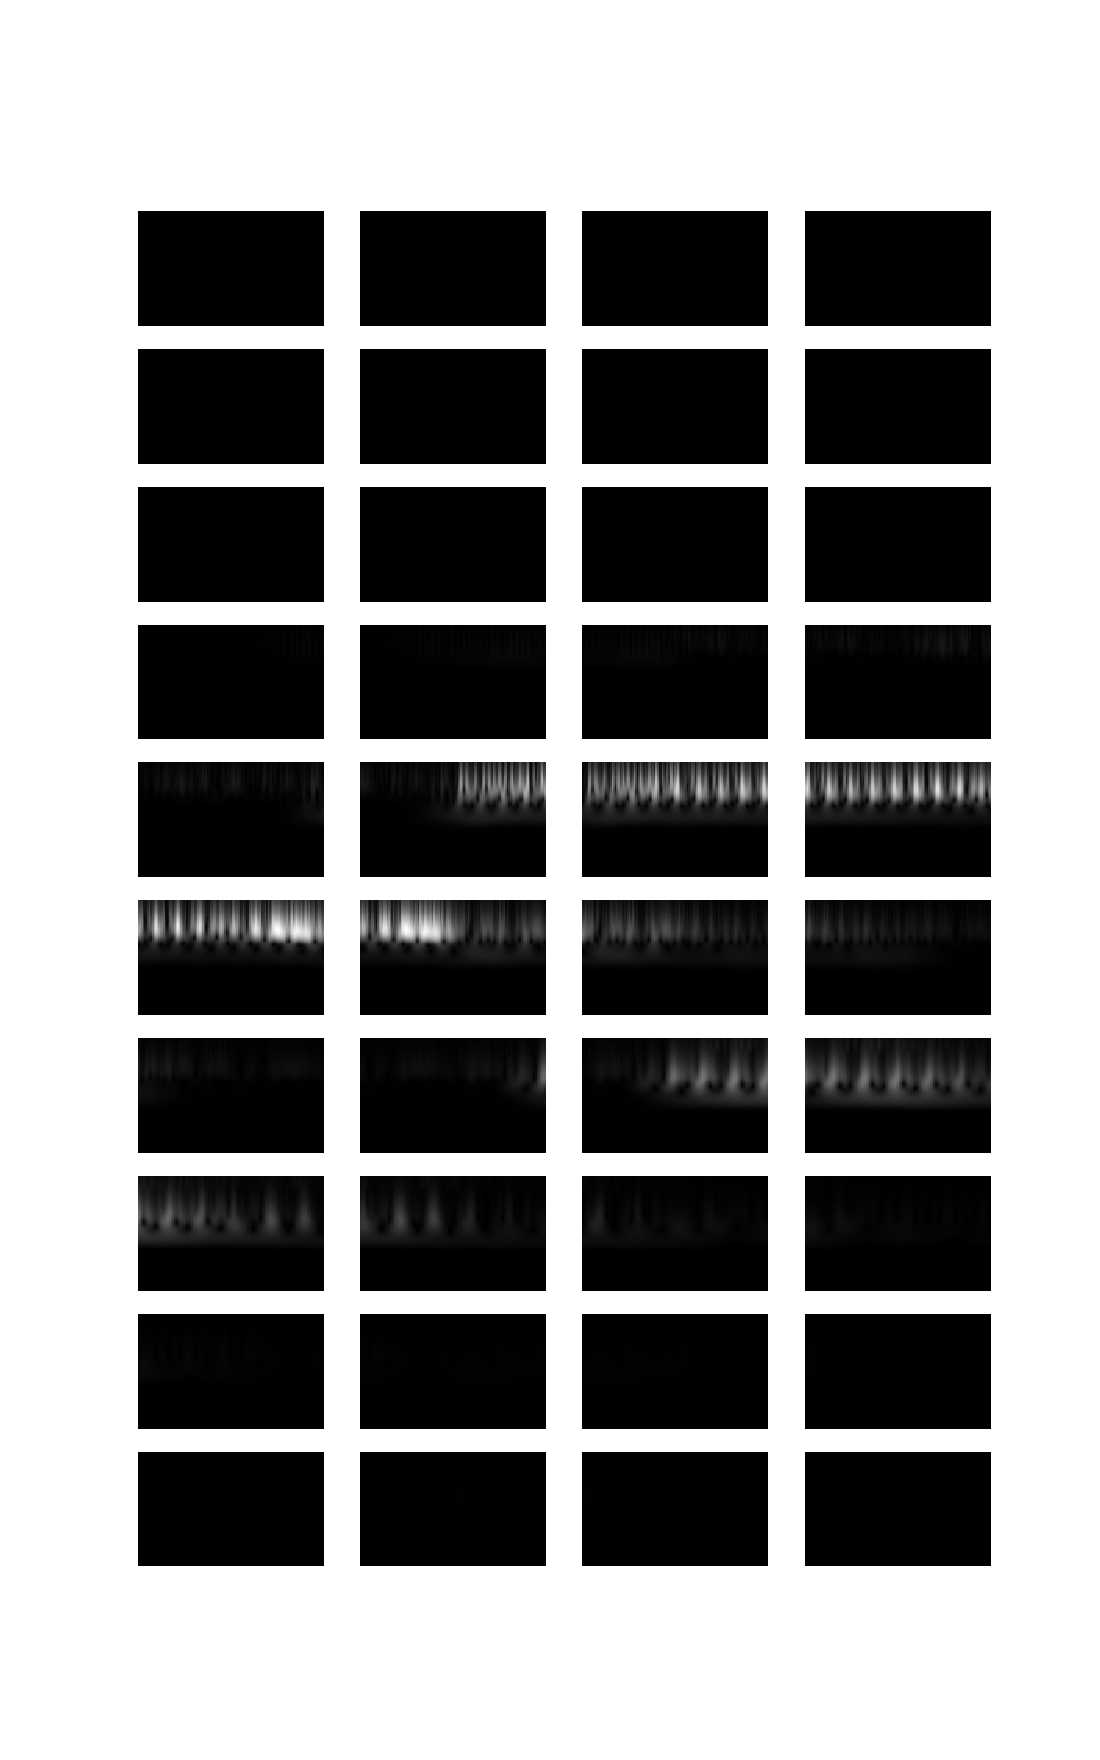

6.49924386201e-05 5.73312698178e-05
0 0 1 1
(119, 119)
7.45043829026e-05 7.16862382895e-05
0 0 1 2
(119, 119)
8.37856426123e-05 7.61487560566e-05
0 0 1 3
(119, 119)
7.20138042855e-05 6.60599111559e-05
0 0 1 4
(119, 119)
6.63110827513e-05 6.16367090883e-05
0 0 2 1
(119, 119)
6.74370867426e-05 6.16999492775e-05
0 0 2 2
(119, 119)
6.31042812497e-05 5.97476193459e-05
0 0 2 3
(119, 119)
5.16221823225e-05 5.17800929688e-05
0 0 2 4
(119, 119)
4.8208819523e-05 4.89190358673e-05
0 0 3 1
(119, 119)
5.47738821871e-05 5.7434458866e-05
0 0 3 2
(119, 119)
6.53785879284e-05 6.68111778961e-05
0 0 3 3
(119, 119)
0.00010372840614 0.000148829152254
0 1 3 4
(119, 119)
0.000486954039551 0.0010898839104
0 7 4 1
(119, 119)
0.00144342656906 0.00240603640301
0 10 4 2
(119, 119)
0.00202535813774 0.00319216617782
0 17 4 3
(119, 119)
0.0026650627064 0.00474508712904
0 24 4 4
(119, 119)
0.00418081804514 0.00662277725313
0 37 5 1
(119, 119)
0.0214199305249 0.038172309298
0 196 5 2
(119, 119)
0.0385957127133 0.05116

In [20]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[0]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


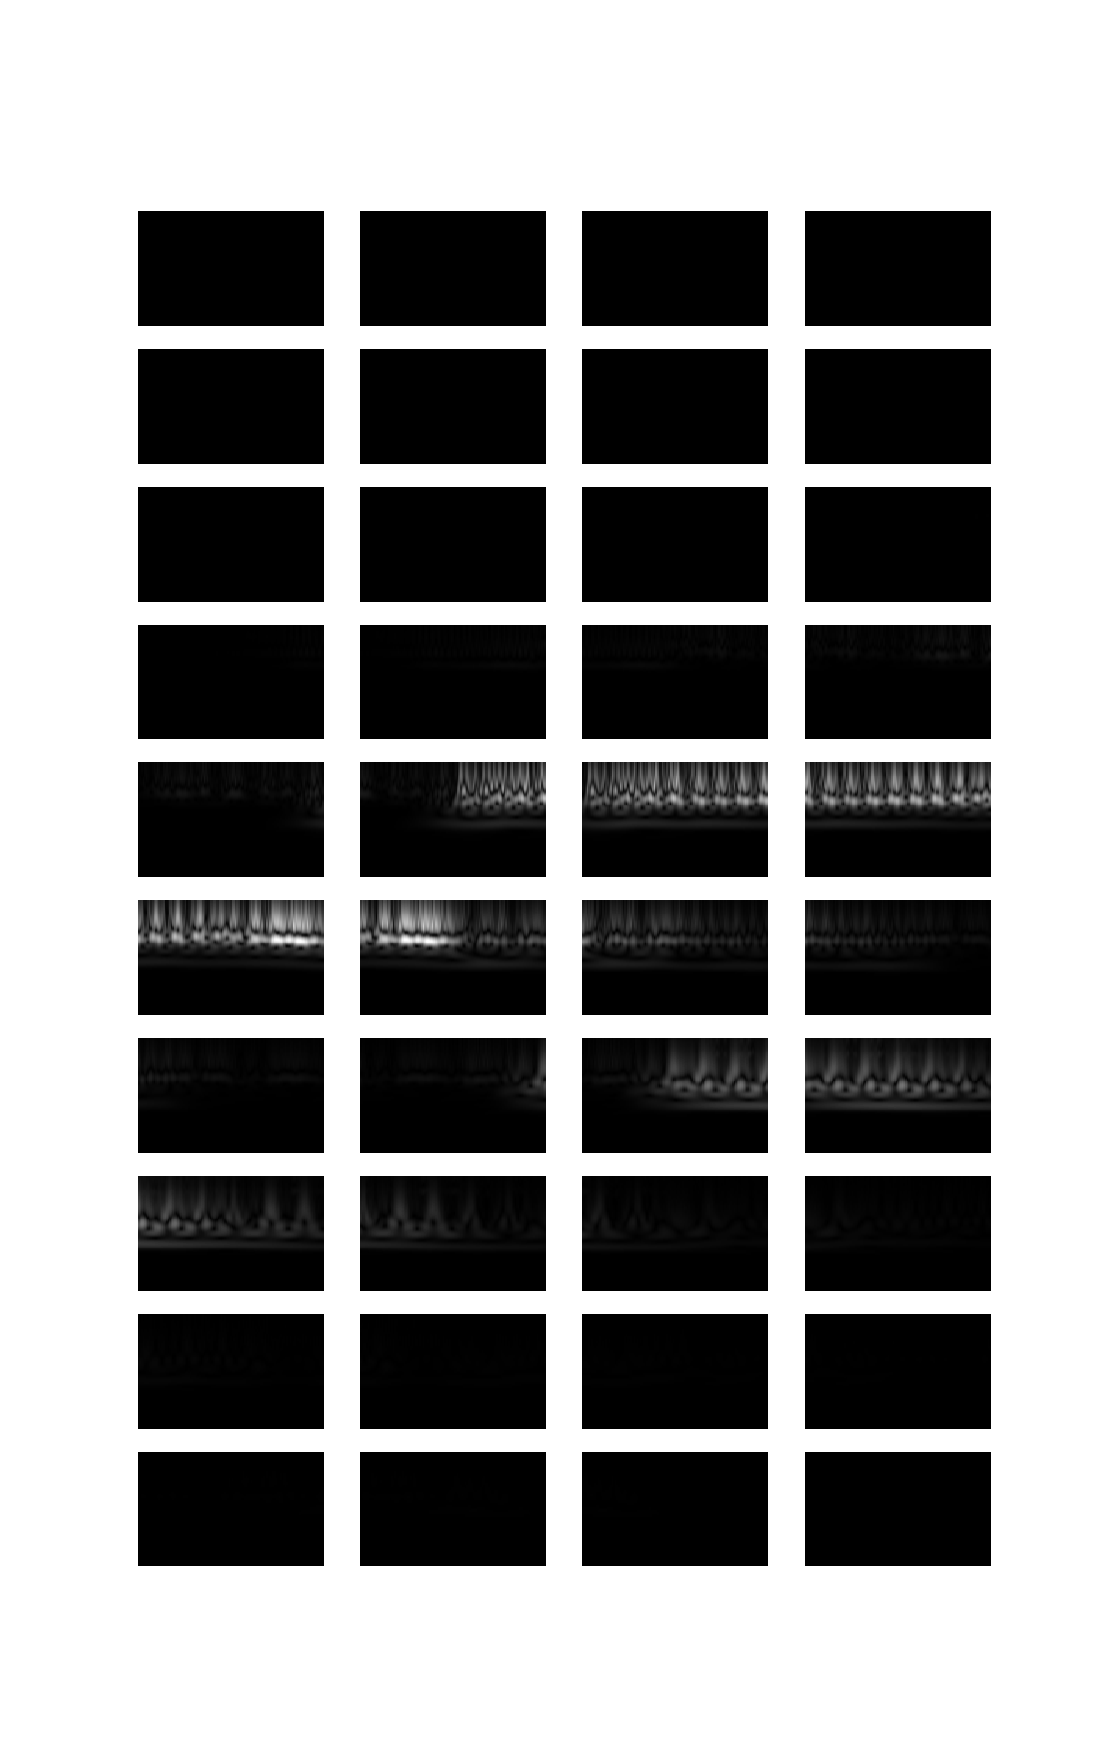

6.38225709617e-05 5.12142589671e-05
0 0 1 1
(119, 119)
6.84874078456e-05 5.96788227006e-05
0 0 1 2
(119, 119)
7.58137311055e-05 6.48225775781e-05
0 0 1 3
(119, 119)
6.55970991584e-05 5.71042852394e-05
0 0 1 4
(119, 119)
6.00296643113e-05 5.29124685387e-05
0 0 2 1
(119, 119)
6.08441562839e-05 5.29301398193e-05
0 0 2 2
(119, 119)
5.72256629649e-05 5.08966560529e-05
0 0 2 3
(119, 119)
4.76939787637e-05 4.45379190034e-05
0 0 2 4
(119, 119)
4.48740787803e-05 4.16173388758e-05
0 0 3 1
(119, 119)
5.11937571697e-05 4.82696481281e-05
0 0 3 2
(119, 119)
6.10739728256e-05 5.61301615437e-05
0 0 3 3
(119, 119)
9.42312560305e-05 0.000125701214255
0 1 3 4
(119, 119)
0.00044775024505 0.000936682900512
0 7 4 1
(119, 119)
0.00131178648089 0.00208496531858
0 10 4 2
(119, 119)
0.00186473723182 0.00272580375524
0 13 4 3
(119, 119)
0.00250990748087 0.00404987129906
0 22 4 4
(119, 119)
0.00402051295646 0.00579653558875
0 33 5 1
(119, 119)
0.0201640406651 0.0334986103327
0 191 5 2
(119, 119)
0.0362855511753 0

In [21]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[1]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()